In [2]:
import open3d as o3d
import os
import numpy as np
import glob
import random
import cv2

import matplotlib.pyplot as plt
from scipy.io import loadmat 

In [24]:
def image_depth_to_pointcloud(image, depth, camera_parameters):
    #if(image.shape[0] != camera_parameters[1]):
    #    print(' ERROR : wrong camera parameters! ')
    #    return None, None
    
    resize_ratio = depth.shape[0] / image.shape[0]
    resized_image = cv2.resize(image, (depth.shape[1], depth.shape[0]))
    
    calibration_matrix = np.array([[resize_ratio*camera_parameters[2],0,resize_ratio*camera_parameters[4]],
                                   [0,camera_parameters[3]*resize_ratio,camera_parameters[5]*resize_ratio],
                                   [0,0,1]])
    print(calibration_matrix)
    inv_calibration = np.linalg.inv(calibration_matrix)
    #print(inv_calibration)
    cloud = []
    colors =[]
    for i in range(depth.shape[0]):
        for j in range(depth.shape[1]):
            point_uv = np.array([j, i, 1])
            depth_pt = depth[i,j]
            if(depth_pt < 100.0):
                continue
            point_3d = depth_pt * np.dot(inv_calibration, np.transpose(point_uv))
            color = resized_image[i,j,:]/255
            cloud.append([point_3d[0], point_3d[1], point_3d[2]])
            colors.append([color[0], color[1], color[2]])
    return cloud, colors

In [18]:
image_path = 'L515_Depth.png'
raw_depth_path = 'depth_raw.mat'
l2_depth_path = 'Ul2.mat'
tv_depth_path = 'Utv.mat'

depth = loadmat(raw_depth_path)['depth_raw']
image = cv2.imread(image_path)
depth_l2 = loadmat(l2_depth_path)['Ul2']
depth_tv = loadmat(tv_depth_path)['Utv']

camera_parameter = np.array([640, 480, 500.465, 500.465, 320,240 ])

Text(0.5, 1.0, 'depth tv')

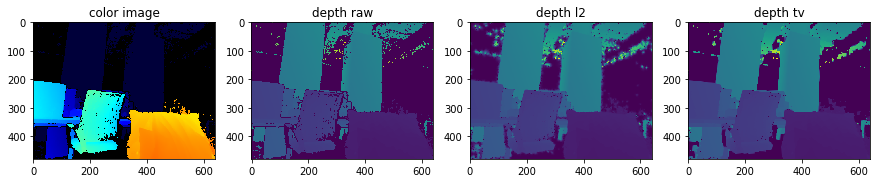

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(image)
plt.title('color image')

plt.subplot(142)
plt.imshow(depth)
plt.title('depth raw')

plt.subplot(143)
plt.imshow(depth_l2)
plt.title('depth l2')

plt.subplot(144)
plt.imshow(depth_tv)
plt.title('depth tv')

In [27]:
cloud, colors = image_depth_to_pointcloud(image, depth, camera_parameter)
point_cloud_o3d = o3d.geometry.PointCloud()
point_cloud_o3d.points = o3d.utility.Vector3dVector(cloud)
point_cloud_o3d.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([point_cloud_o3d])

[[500.465   0.    320.   ]
 [  0.    500.465 240.   ]
 [  0.      0.      1.   ]]
